<a href="https://colab.research.google.com/github/Nouran-Khallaf/Arabic-Readability-Corpus/blob/main/NoteBooks/3_Text_Summariser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summariser
![Comparison Diagram](https://raw.githubusercontent.com/Nouran-Khallaf/NLP_Visualisation/main/static/images/Extractive-vs-Abstractive-Summarization.png)
*Diagram 1: Comparative Analysis of Summarization Techniques*
## Tutorial: Building a Text Summarizer

### Introduction
This notebook demonstrates how to build a text summarizer using  Multi-document Summaries Corpora (2011 and 2013) dataset.
The dataset is derived from publicly available WikiNews (http://www.wikinews.org/) English texts. The source texts were under CC Attribution Licence V2.5 (http://creativecommons.org/licenses/by/2.5/). Texts in other languages have been translated by native speakers of each language.
Languages included:
- Arabic
- Czech
- English
- French
- Greek
- Hebrew
- Hindi
- Chinese (2013)
- Romanian (2013)
- Spanish (2013)

For more information, please visit [Multi-document Summaries Corpora](https://www.lancaster.ac.uk/staff/elhaj/corpora.html).



**Extractive Summarization**:
Extractive summarization involves selecting key sentences or phrases from the original text and concatenating them to create a summary. The goal is to extract the most important information while maintaining the original context. This method does not generate new sentences but rather identifies and extracts the most relevant parts of the text.




**Abstractive Summarization**:
Abstractive summarization, on the other hand, involves generating new sentences that convey the most important information from the original text. This method goes beyond simply extracting key phrases and instead uses techniques like natural language generation to create a coherent and concise summary that may include paraphrasing and restructuring of information.

![Comparison Diagram](https://raw.githubusercontent.com/Nouran-Khallaf/NLP_Visualisation/main/static/images/extractive.webp)![Comparison Diagram](https://raw.githubusercontent.com/Nouran-Khallaf/NLP_Visualisation/main/static/images/abstractive.png)
*Diagram 2: Analysis of Extractive Summarization *
*Diagram 3: Analysis of Abstractive Summarization *

---
**Differences**:
- **Approach**: Extractive summarization selects and combines existing sentences, while abstractive summarization generates new sentences.
- **Output**: Extractive summarization tends to be more faithful to the original text, as it directly uses parts of it, whereas abstractive summarization can be more concise and coherent by generating new text.
- **Complexity**: Abstractive summarization is generally more complex and computationally intensive, as it requires understanding and generating natural language, whereas extractive summarization relies on identifying and selecting key parts of the text.


#### Advantages and Disadvantages

Each summarization approach has its advantages and challenges:
- **Extractive Summarization** is computationally efficient and easier to implement but may not fully capture the underlying meanings or nuances of the text.
- **Abstractive Summarization** generates more refined summaries but is computationally more demanding and can introduce errors or inconsistencies.


---



In [50]:
!pip install gdown
!pip install plotly
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install tabulate
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Step 2: Load and Prepare Data
We will load the dataset and clean it. For demonstration purposes.

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1GSRJgJaRzb1OauKtHdwNoF4UnkKAt9cK'
output = 'Multilingual-Dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GSRJgJaRzb1OauKtHdwNoF4UnkKAt9cK
To: /content/Multilingual-Dataset.zip
100%|██████████| 1.28M/1.28M [00:00<00:00, 87.4MB/s]


'Multilingual-Dataset.zip'

In [52]:
import zipfile
import os

if zipfile.is_zipfile(output):
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print("Files extracted:")
    print(os.listdir('/content/'))
else:
    print("Downloaded file is not a zip file.")

Files extracted:
['.config', 'SourceTexts', 'Text-Summarization-NLP.webp', 'Extractive-vs-Abstractive-Summarization.webp', '__MACOSX', 'ddd', '.ipynb_checkpoints', 'cleaned_and_summarized_contents.csv', 'plots', 'Multilingual-Dataset.zip', 'combined_files.csv', 'Extractive-vs-Abstractive-Summarization.png', 'sample_data']



### Data Prepration
we need to organize the text files in the `SourceTexts` directory into subdirectories based on language identifiers extracted from the filenames. It dynamically identifies unique language codes, creates corresponding language-specific folders, and moves each file to its appropriate folder, thereby streamlining file management and access based on language.

- Arabic
- Czech
- English
- French
- Greek
- Hebrew
- Hindi

In [53]:
import os
import shutil

# Define the source directory
source_dir = 'SourceTexts'

# List all files in the source directory
files = os.listdir(source_dir)

# Create a set to store unique language identifiers
languages = set()

# Identify unique languages from filenames
for file in files:
    language = file.split('.')[1].lower()  # Normalize to lowercase
    languages.add(language)

# Create folders for each language and move corresponding files
for language in languages:
    # Create the language folder if it doesn't exist
    language_dir = os.path.join(source_dir, language)
    os.makedirs(language_dir, exist_ok=True)

    # Move files into the language folder
    for file in files:
        if file.split('.')[1].lower() == language:  # Normalize to lowercase
            shutil.move(os.path.join(source_dir, file), os.path.join(language_dir, file))

print("Files have been organized into folders.")


Files have been organized into folders.


Here we combine the content of text files from the `SourceTexts` directory into a single Pandas DataFrame, with each file's content stored as a row in the DataFrame. It then saves the DataFrame to a CSV file.

1. **Import Required Modules**:
   - The script imports the `os` module for directory and file operations and the `pandas` module for creating and manipulating the DataFrame.

In [ ]:
import os
import pandas as pd


2. **Define the Function to Combine Files**:
   - A function named `combine_files_to_dataframe` is defined. This function takes a directory path as input and returns a DataFrame containing the file names and their contents.
- **Initialize an Empty List**: An empty list named `data` is created to store the file names and their contents.
- **Loop Through Files**: The function loops through all files in the specified directory using `os.listdir()`.
- **Construct Full File Path**: For each file, the full path is constructed using `os.path.join()`.
- **Check if it’s a File**: The script ensures the path is a file using `os.path.isfile()`.
- **Read File Content**: If it’s a file, the script reads its content and appends a dictionary containing the file name (`Title`) and its content (`Content`) to the `data` list.
- **Create a DataFrame**: Finally, a Pandas DataFrame is created from the `data` list and returned.

In [55]:
def combine_files_to_dataframe(directory_path):
       # Initialize an empty list to store the data
       data = []

       # Loop through all files in the directory
       for file_name in os.listdir(directory_path):
           # Construct full file path
           file_path = os.path.join(directory_path, file_name)

           # Ensure it's a file
           if os.path.isfile(file_path):
               # Read the content of each file
               with open(file_path, 'r') as file:
                   content = file.read()
                   # Append the file name and content to the data list
                   data.append({'Title': file_name, 'Content': content.strip()})

       # Create a DataFrame from the data list
       df = pd.DataFrame(data)
       return df


3. **Specify the Directory Path**:
   - The directory containing the files is specified. In this example, the directory path is `/content/SourceTexts/english`.

In [ ]:
directory_path = '/content/SourceTexts/english' ## here you can change the language

4. **Combine Files into a DataFrame**:
   - The `combine_files_to_dataframe` function is called with the specified directory path, and the resulting DataFrame is stored in the variable `df`.

In [ ]:
df = combine_files_to_dataframe(directory_path)

5. **Display the DataFrame**:
   - The DataFrame is printed to the console to display the combined content of the files.

In [ ]:
print(df)



6. **Save the DataFrame to a CSV File**:
   - The DataFrame is saved to a CSV file named `combined_files.csv` without the index using the `to_csv` method.

In [ ]:
df.to_csv('combined_files.csv', index=False)


---

> The following code cell is designed to perform the combined operations described above. Let's execute it to see the results.
---

In [56]:
import os
import pandas as pd

def combine_files_to_dataframe(directory_path):
    # Initialize an empty list to store the data
    data = []

    # Loop through all files in the directory
    for file_name in os.listdir(directory_path):
        # Construct full file path
        file_path = os.path.join(directory_path, file_name)

        # Ensure it's a file
        if os.path.isfile(file_path):
            # Read the content of each file
            with open(file_path, 'r') as file:
                content = file.read()
                # Append the file name and content to the data list
                data.append({'Title': file_name, 'Content': content.strip()})

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    return df

# Specify the directory containing the files
directory_path = '/content/SourceTexts/english'

# Combine the files into a DataFrame
df = combine_files_to_dataframe(directory_path)

# Display the DataFrame
print(df)

# save the DataFrame to a CSV file
df.to_csv('combined_files.csv', index=False)

            Title                                            Content
0   M0046.english  Climate Conference in Bali concluded; opinions...
1   M0015.english  One year on, London remembers 7/7 victims\n\nF...
2   M0084.english  Tail from Air France jet recovered from Atlant...
3   M0024.english  European Union calls for release of British cr...
4   M0056.english  Wikinews investigates the reconstruction of Pi...
..            ...                                                ...
95  M0065.english  US government stops Haiti evacuations\n\nSunda...
96  M0075.english  Authenticity of new Abu Ghraib photos confirme...
97  M0071.english  USA leaving Abu Ghraib\n\nFriday, March 10, 20...
98  M0023.english  British sailors detained by Iran "to be tried ...
99  M0029.english  UK prepared to go 'into different phase' if sa...

[100 rows x 2 columns]


## Step 3: Data Cleaning

Enhances the readability and usability of text data by:
1. Removing HTML tags using the `BeautifulSoup` library.
2. Cleaning the text with regular expressions to replace multiple spaces, remove standalone numbers, and trim whitespace.
3. Loading the original text data from a CSV file into a DataFrame.
4. Applying the text cleaning process to the 'Content' column and storing the cleaned text in a new column named 'clean_content'.

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup

2. **Define a Function to Clean HTML**:
   - A function named `clean_html` is defined to remove HTML tags from a string. It uses `BeautifulSoup` to parse the HTML and extract the text content.
- **Parameter**: `raw_html` - The raw HTML string to be cleaned.
- **Processing**: `BeautifulSoup` parses the HTML and the `get_text()` method extracts the text content.
- **Return**: The cleaned text without HTML tags.

In [ ]:
def clean_html(raw_html):
       """Remove HTML tags from a string"""
       soup = BeautifulSoup(raw_html, "html.parser")
       return soup.get_text()

3. **Define a Function to Clean Text**:
  - A function named `clean_text` is defined to clean the text by removing unwanted patterns and extra spaces. It first removes HTML tags using the `clean_html` function and then applies various regular expressions to clean the text further.
- **Parameter**: `text` - The text string to be cleaned.
- **Processing**:
     - `clean_html(text)`: Removes HTML tags.
     - `re.sub(r'\s+', ' ', text)`: Replaces multiple spaces and newlines with a single space.
     - `re.sub(r'\b\d+\b', '', text)`: Removes standalone numbers (optional, based on specific needs).
     - `text.strip()`: Removes leading and trailing spaces.
- **Return**: The cleaned text.

In [60]:
def clean_text(text):
       """Remove unwanted text patterns and clean the text"""
       text = clean_html(text)
       text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
       text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers if needed
       text = text.strip()  # Remove leading/trailing spaces
       return text

4. **Load the DataFrame**:
   - The script loads a DataFrame from a CSV file named `combined_files.csv` using the `pandas` library.


In [61]:
df = pd.read_csv('combined_files.csv')

5. **Apply Preprocessing to the 'Content' Column**:
   - The script applies the `clean_text` function to each entry in the 'Content' column of the DataFrame, creating a new column 'clean_content' with the cleaned text.
- **Processing**: The `apply` method is used to apply the `clean_text` function to each row in the 'Content' column.
- **Result**: A new column 'clean_content' is added to the DataFrame containing the cleaned text.

In [62]:
df['clean_content'] = df['Content'].apply(clean_text)


---

> The following code cell is designed to perform the combined operations described above. Let's execute it to see the results.
---

In [63]:
import pandas as pd
import re
from bs4 import BeautifulSoup

def clean_html(raw_html):
    """Remove HTML tags from a string"""
    soup = BeautifulSoup(raw_html, "html.parser")
    return soup.get_text()

def clean_text(text):
    """Remove unwanted text patterns and clean the text"""
    text = clean_html(text)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers if needed
    text = text.strip()  # Remove leading/trailing spaces
    return text


# Load your DataFrame
df = pd.read_csv('combined_files.csv')

# Apply preprocessing to the 'Content' column
df['clean_content'] = df['Content'].apply(clean_text)

## Step 4: Load the SpaCy Model and Tokenizer
Load the SpaCy English model, which will be used for tokenization, parsing, and named entity recognition. Recreate the tokenizer with the updated stopwords list.
    


In [64]:
import spacy
from spacy.tokenizer import Tokenizer
import pandas as pd
from tabulate import tabulate

In [65]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)


## Step 5: Tokenize and Filter Text


In [70]:
def tokenize_and_filter(text):
    """Tokenize the text and filter out stop words, punctuation, and empty tokens"""
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]
    return tokens

# Apply tokenization to the 'clean_content' column
df['tokens'] = df['clean_content'].apply(tokenize_and_filter)

# Display the DataFrame with tokens
print(df[['Title', 'tokens']])


            Title                                             tokens
0   M0046.english  [Climate, Conference, Bali, concluded, opinion...
1   M0015.english  [year, London, remembers, victims, Friday, Jul...
2   M0084.english  [Tail, Air, France, jet, recovered, Atlantic, ...
3   M0024.english  [European, Union, calls, release, British, cre...
4   M0056.english  [Wikinews, investigates, reconstruction, Pichi...
..            ...                                                ...
95  M0065.english  [government, stops, Haiti, evacuations, Sunday...
96  M0075.english  [Authenticity, new, Abu, Ghraib, photos, confi...
97  M0071.english  [USA, leaving, Abu, Ghraib, Friday, March, Uni...
98  M0023.english  [British, sailors, detained, Iran, tried, espi...
99  M0029.english  [UK, prepared, different, phase, sailors, mari...

[100 rows x 2 columns]



## Step 5: Create a Directory for Plots
Create a new directory named 'plots' to store generated plots. This helps keep the workspace organized.
    


In [27]:
!mkdir plots

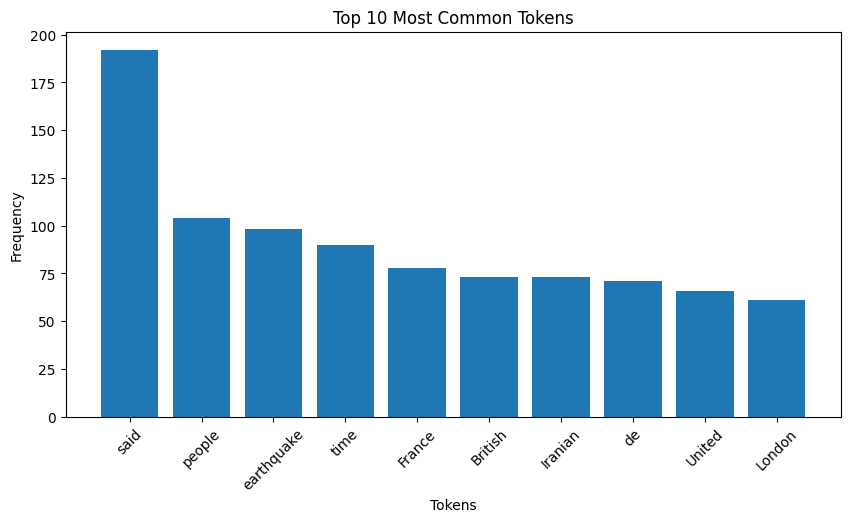

In [71]:
import matplotlib.pyplot as plt
from collections import Counter

# Create a directory for plots
os.makedirs('plots', exist_ok=True)

# Visualize the top 10 most common tokens
all_tokens = [token for tokens in df['tokens'] for token in tokens]
token_counts = Counter(all_tokens)
common_tokens = token_counts.most_common(10)

# Plot the top 10 most common tokens
tokens, counts = zip(*common_tokens)
plt.figure(figsize=(10, 5))
plt.bar(tokens, counts)
plt.title('Top 10 Most Common Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('plots/top_10_tokens.png')
plt.show()


In [74]:
!pip install sumy
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.4 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=56250f0c96e1026b9921dfaeb7141edb1ae83bddfed5856ac3bf2b5686644111
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ff4867f60556cc7d3b4ef222a9a306e4e2e61f9bc1c3bc4495d6946c54ec7daf
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [89]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import nltk
nltk.download('punkt')


def summarize_text(text, sentences_count=2):
    """Summarize the text using LSA summarizer"""
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return ' '.join([str(sentence) for sentence in summary])

# Apply summarization to the 'clean_content' column
df['sumy_summary'] = df['clean_content'].apply(lambda x: summarize_text(x, sentences_count=2))

# Display the DataFrame with summaries
print(df[['Title', 'sumy_summary']])

# Save the DataFrame with summaries to a CSV file
df.to_csv('summarized_files.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            Title                                       sumy_summary
0   M0046.english  Climate Conference in Bali concluded; opinions...
1   M0015.english  On this day last year, a series of coordinated...
2   M0084.english  Meanwhile, France said that it has dispatched ...
3   M0024.english  European Union calls for release of British cr...
4   M0056.english  Pichilemu is the most popular beach in O'Higgi...
..            ...                                                ...
95  M0065.english  A spokesman for Floridian governor Charlie Cri...
96  M0075.english  Contradicting claims made by some media outlet...
97  M0071.english  Lt. Col. Barry Johnson, military spokesman, sa...
98  M0023.english  Individuals who are tried and found guilty of ...
99  M0029.english  UK prepared to go 'into different phase' if sa...

[100 rows x 2 columns]



## Step 6: Extract Linguistic Annotations
Extract part of speech tags and dependencies for each token and display them in a DataFrame.
    



## Step 7: Visualize Syntactic Dependencies
Use SpaCy's displaCy visualizer to create an interactive diagram of the sentence's syntactic dependencies.
    

In [79]:
# Step 7: Visualize Syntactic Dependencies
def visualize_syntactic_dependencies(text):
    """Visualize syntactic dependencies of the first sentence in the text"""
    doc = nlp(text)
    first_sentence = list(doc.sents)[0]  # Get the first sentence
    displacy.render(first_sentence, style='dep', jupyter=True)

# Visualize the syntactic dependencies for the first sentence of the first document
first_text = df['clean_content'].iloc[0]
visualize_syntactic_dependencies(first_text)

## Step 8: Named Entity Recognition (NER)
Extract and display named entities from the text. Visualize entities using SpaCy's displaCy visualizer.
    

In [81]:
# Step 7: Visualize Syntactic Dependencies and Extract Entity Details
def visualize_and_extract_entities(text):
    """Visualize syntactic dependencies and extract entity details for the first sentence"""
    doc = nlp(text)
    first_sentence = list(doc.sents)[0]  # Get the first sentence
    displacy.render(first_sentence, style='dep', jupyter=True)
    # Visualize entities
    displacy.render(doc, style="ent")

    # Extract entity details
    data = [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
    headers = ['Entity', 'Start Char', 'End Char', 'Label']
    print(tabulate(data, headers=headers, tablefmt="pretty"))

# Visualize and extract entities for the first sentence of the first document
first_text = df['clean_content'].iloc[0]
visualize_and_extract_entities(first_text)

+-----------------------------------------------------------+------------+----------+-------------+
|                          Entity                           | Start Char | End Char |    Label    |
+-----------------------------------------------------------+------------+----------+-------------+
|                           Bali                            |     22     |    26    |     GPE     |
|                     Monday, December                      |     65     |    81    |    DATE     |
|                    the last two weeks                     |    126     |   144    |    DATE     |
|                           Bali                            |    148     |   152    |     GPE     |
|                         Saturday                          |    177     |   185    |    DATE     |
|                           Bali                            |    226     |   230    |   PERSON    |
|                          Roadmap                          |    335     |   342    |   PERSON    |


#Extractive Summary

## Step 9: Extractive Summarization using TF-IDF
Here's a different approach to extractive summarization using the TF-IDF (Term Frequency-Inverse Document Frequency) method:

1. **Calculate TF-IDF scores for each term in the document**.
2. **Rank sentences based on the sum of TF-IDF scores of their terms**.
3. **Select the top N sentences with the highest scores as the summary**.

In [84]:
# Function to generate extractive summary using TF-IDF
def extractive_summary(text, top_n=3):
    sentences = text.split('.')
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)
    sentence_scores = np.sum(X.toarray(), axis=1)
    top_sentence_indices = sentence_scores.argsort()[-top_n:][::-1]
    summary = '. '.join([sentences[i].strip() for i in top_sentence_indices if sentences[i].strip()]) + '.'
    return summary

# Apply the summarization function to each content
df['Tfidf_Summary'] = df['Content'].apply(extractive_summary)

# Display the DataFrame with summaries
print(df[['Title', 'Content','Tfidf_Summary']])

            Title                                            Content  \
0   M0046.english  Climate Conference in Bali concluded; opinions...   
1   M0015.english  One year on, London remembers 7/7 victims\n\nF...   
2   M0084.english  Tail from Air France jet recovered from Atlant...   
3   M0024.english  European Union calls for release of British cr...   
4   M0056.english  Wikinews investigates the reconstruction of Pi...   
..            ...                                                ...   
95  M0065.english  US government stops Haiti evacuations\n\nSunda...   
96  M0075.english  Authenticity of new Abu Ghraib photos confirme...   
97  M0071.english  USA leaving Abu Ghraib\n\nFriday, March 10, 20...   
98  M0023.english  British sailors detained by Iran "to be tried ...   
99  M0029.english  UK prepared to go 'into different phase' if sa...   

                                        Tfidf_Summary  
0   Opinions\n\nPerspectives on the outcome varied...  
1   Prime Minister Tony

### 4. Summarisation Function
Implement a simple text summarizer based on sentence extraction.

In [85]:
!pip install summa
!pip install seaborn mglearn
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from summa import summarizer

In [87]:
def summa_summarize(text, ratio=0.2):
    """Summarize text using the summa library"""
    summary = summarizer.summarize(text, ratio=ratio, language='english')
    return summary

In [92]:
# Apply summarization to the 'clean_content' column using summa
df['summa_summary'] = df['clean_content'].apply(lambda x: summa_summarize(x, ratio=0.2))



# Save the cleaned and summarized data to a CSV file if needed
df.to_csv('cleaned_and_summarized_contents.csv', index=False)


### 6. Save Summarized Data
Save the summarized data to a new CSV file.

In [13]:
output_file = '/summarized_data.csv'
df.to_csv(output_file, index=False)
print(f"Summarized data saved to {output_file}")

Summarized data saved to /summarized_data.csv


In [95]:

# Visualize the data using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Title', 'Clean Content', 'summa_summary', 'sumy_summary','Tfidf_Summary'],
                fill_color='paleturquoise',
align='left'),
    cells=dict(values=[df['Title'], df['clean_content'], df['summa_summary'],df['sumy_summary'],df['Tfidf_Summary']],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(
    title='Content Summarization',
    width=1000,
    height=600,
)

fig.show()

### Abstarctive summary
Creating a summarizer involves several steps, especially for abstractive summarization:

1. **Text Preprocessing**: Clean and prepare the text by removing stop words, punctuation, and performing tokenization.
2. **Feature Extraction**: For extractive summarization, extract features like sentence importance, frequency of terms, etc. For abstractive summarization, use techniques like word embeddings.
3. **Model Training**: Train a model to understand the structure and content of the text. This could be a simple model for extractive summarization or a complex neural network for abstractive summarization.
4. **Generation**: Generate the summary by selecting key sentences (extractive) or generating new sentences (abstractive).

For a detailed implementation, you might need to delve into specific NLP frameworks and techniques, such as using transformer models (e.g., BERT, GPT) for abstractive summarization.

In [ ]:
from transformers import pipeline

# Load a summarization pipeline
summarizer = pipeline("summarization")

def summarize_text(text):
    # Use the summarizer to condense the text
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

# Apply summarization to the 'clean_content' column
df['summary_transformer'] = df['clean_content'].apply(summarize_text)

print("\nFirst few rows of the summarized dataset:")
print(df[['clean_content', 'summary_transformer']].head())

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


### 7. Visualize Results
Visualize the length of original texts vs. summaries.

In [14]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

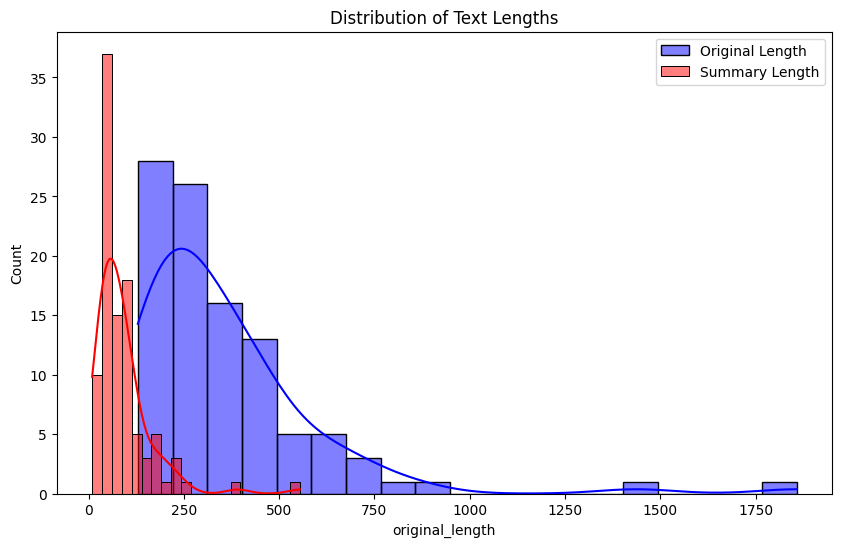

In [15]:
df['original_length'] = df['clean_content'].apply(lambda x: len(x.split()))
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['original_length'], kde=True, color='blue', label='Original Length')
sns.histplot(df['summary_length'], kde=True, color='red', label='Summary Length')
plt.legend()
plt.title('Distribution of Text Lengths')
plt.show()

In [16]:
import plotly.express as px
# Visualize the data using Plotly
fig = px.bar(df, x='Title', y=['original_length', 'summary_length'],
             labels={'value': 'Length', 'Title': 'Title'},
             title='Comparison of Original and Summarized Content Length',
             barmode='group')

fig.show()

In [18]:
# Scatter Plot of Original vs Summarized Lengths using Plotly
fig_scatter = px.scatter(df, x='original_length', y='summary_length',
                         labels={'original_length': 'Original Length', 'summary_length': 'Summary Length'},
                         title='Original vs Summarized Text Lengths')
fig_scatter.show()

# Bar Chart of Word Count Reduction using Plotly
df['reduction'] = df['original_length'] - df['summary_length']
fig_bar_reduction = px.bar(df, x='Title', y='reduction',
                           labels={'reduction': 'Reduction in Word Count', 'Title': 'Title'},
                           title='Reduction in Word Count per Title')
fig_bar_reduction.show()

In [21]:
df

,Title,Content,clean_content,summary,original_length,summary_length,reduction
0,M0046.english,Climate Conference in Bali concluded; opinions...,Climate Conference in Bali concluded; opinions...,The Roadmap establishes the target year of an...,606,165,441
1,M0015.english,"One year on, London remembers 7/7 victims\n\nF...","One year on, London remembers / victims Friday...","On this day last year, a series of coordinated...",384,105,279
2,M0084.english,Tail from Air France jet recovered from Atlant...,Tail from Air France jet recovered from Atlant...,Tail from Air France jet recovered from Atlant...,145,38,107
3,M0024.english,European Union calls for release of British cr...,European Union calls for release of British cr...,European Union calls for release of British cr...,212,47,165
4,M0056.english,Wikinews investigates the reconstruction of Pi...,Wikinews investigates the reconstruction of Pi...,The February earthquake and a subsequent tsun...,1858,554,1304
...,...,...,...,...,...,...,...
95,M0065.english,US government stops Haiti evacuations\n\nSunda...,"US government stops Haiti evacuations Sunday, ...","US government stops Haiti evacuations Sunday, ...",322,59,263
96,M0075.english,Authenticity of new Abu Ghraib photos confirme...,Authenticity of new Abu Ghraib photos confirme...,"The Washington Post has noted, as suggested by...",403,143,260
97,M0071.english,"USA leaving Abu Ghraib\n\nFriday, March 10, 20...","USA leaving Abu Ghraib Friday, March , United...","In January , a United States Army court martia...",244,44,200
98,M0023.english,"British sailors detained by Iran ""to be tried ...","British sailors detained by Iran ""to be tried ...","British sailors detained by Iran ""to be tried ...",669,116,553


In [20]:
from transformers import pipeline

# Load a summarization pipeline
summarizer = pipeline("summarization")

def summarize_text(text):
    # Use the summarizer to condense the text
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

# Apply summarization to the 'clean_content' column
df['summary_transformer'] = df['clean_content'].apply(summarize_text)

print("\nFirst few rows of the summarized dataset:")
print(df[['clean_content', 'summary_transformer']].head())


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2642 > 1024). Running this sequence through the model will result in indexing errors


IndexError: index out of range in self

https://developers.google.com/chart/interactive/docs/gallery/wordtree